In [47]:
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

from scripts.CLIPTS import get_ts_embeddings, find_ts_matches

def plot_matches(values):
    emptycount = 0
    plt.figure(figsize=(20,10))
    for i in values:
        if len(np.unique(np.array(i))) == 1:
            emptycount+=1
        else:
            plt.plot(i)
        
    print("Out of ", len(values), " matches, ", emptycount, " are empty")

def read(path):
    return pd.read_csv(path, lineterminator='\n')

def get_model_embeddings(data_path, model_path):
    df = read(data_path)
    return  get_ts_embeddings(df, model_path)

# Modified CLIP

## BTC

In [48]:
model, ts_embeddings = get_model_embeddings("train_val_data/BTC_val.csv", "weights/BTC_100000.pt")

TypeError: make_train_valid_dfs() missing 1 required positional argument: 'TRAIN_DATA_PATH'

Out of  10  matches,  0  are empty


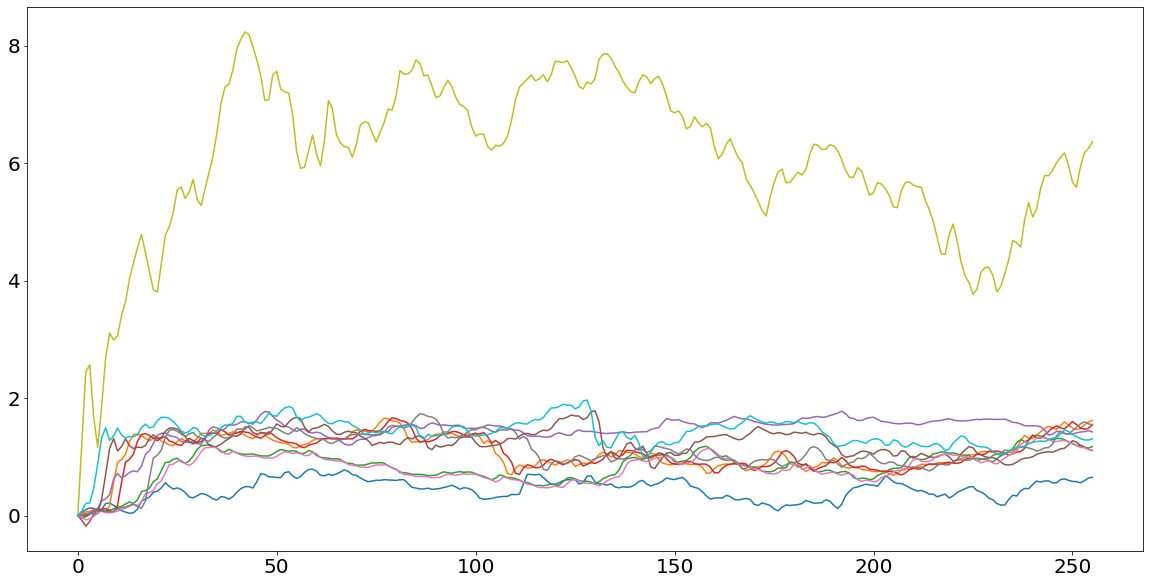

In [45]:
matches = find_ts_matches(model, 
             ts_embeddings,
             query="The steady rise in BTC price not only reflects its immense value as a digital asset, but also offers a promising outlook for investors, fueling excitement and confidence in its future trajectory.",
             n=10)
plot_matches(ts_embeddings[matches])
plt.savefig("btc_ts_pred.png")

tensor(1.5431)

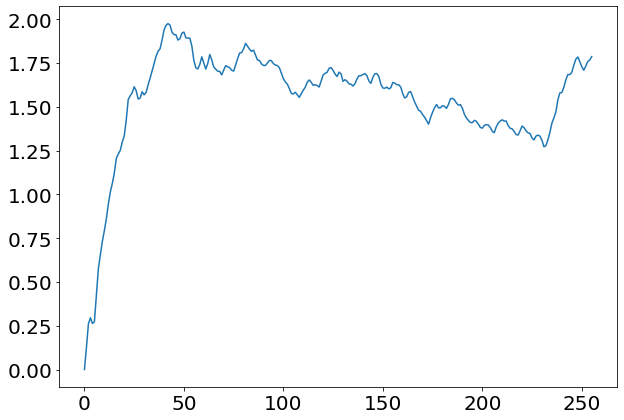

In [46]:
plt.figure(figsize=(10,7))
plt.plot(ts_embeddings[matches].mean(axis=0))
plt.savefig("btc_ts_pred_mean.png")
ts_embeddings[matches].mean(axis=0).mean()

Out of  10  matches,  0  are empty


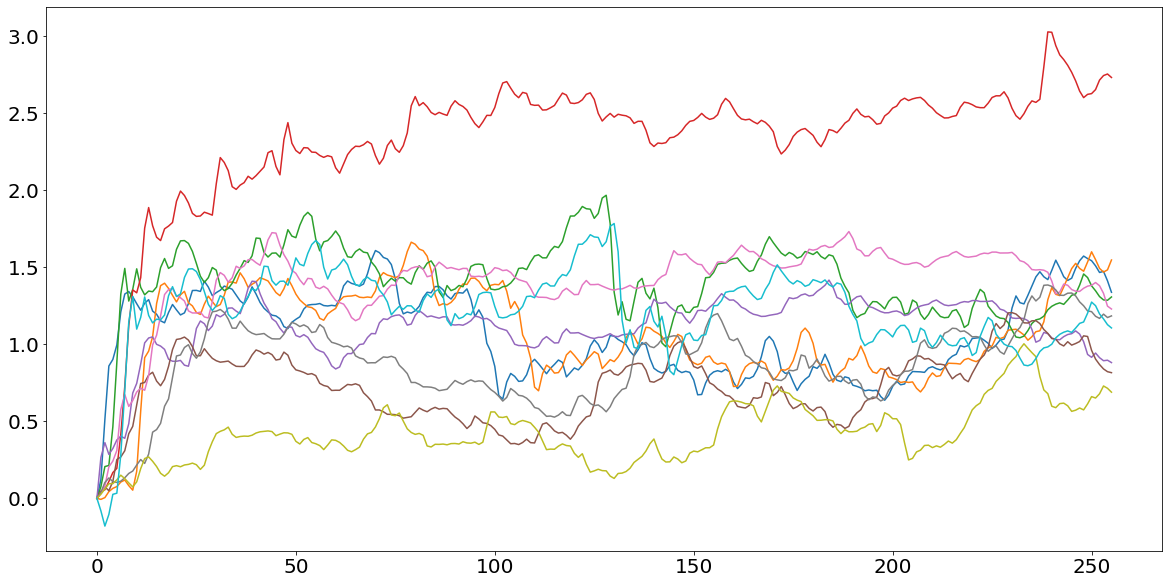

In [43]:
matches = find_ts_matches(model, 
             ts_embeddings,
             query="The volatile nature of BTC price can make it challenging for investors to predict and navigate, causing anxiety and uncertainty in the market.",
             n=10)
plot_matches(ts_embeddings[matches])
plt.savefig("btc_ts_neg_pred.png")

tensor(1.1627)

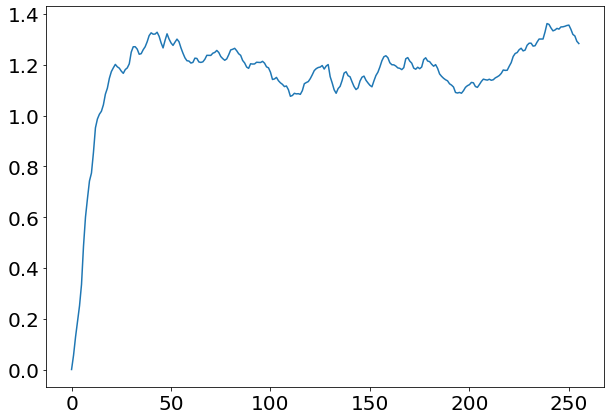

In [44]:
plt.figure(figsize=(10,7))

plt.plot(ts_embeddings[matches].mean(axis=0))
plt.savefig("btc_ts_neg_pred_mean.png")
ts_embeddings[matches].mean(axis=0).mean()

In [55]:
import os

pos = ['860.png',
 '2247.png',
 '333.png',
 '274.png',
 '988.png',
 '1148.png',
 '1080.png',
 '779.png',
 '1359.png',
 '1895.png']

neg = ['3350.png',
 '8990.png',
 '1448.png',
 '1259.png',
 '3928.png',
 '4687.png',
 '4374.png',
 '2999.png',
 '5583.png',
 '7758.png']


In [56]:
for i in pos:
    print(i)
    os.system("cp timeseries_images/btc-librosa-images/"+i+" .")

860.png
2247.png
333.png
274.png
988.png
1148.png
1080.png
779.png
1359.png
1895.png


In [57]:
for i in neg:
    print(i)
    os.system("cp timeseries_images/btc-librosa-images/"+i+" .")

3350.png
8990.png
1448.png
1259.png
3928.png
4687.png
4374.png
2999.png
5583.png
7758.png
